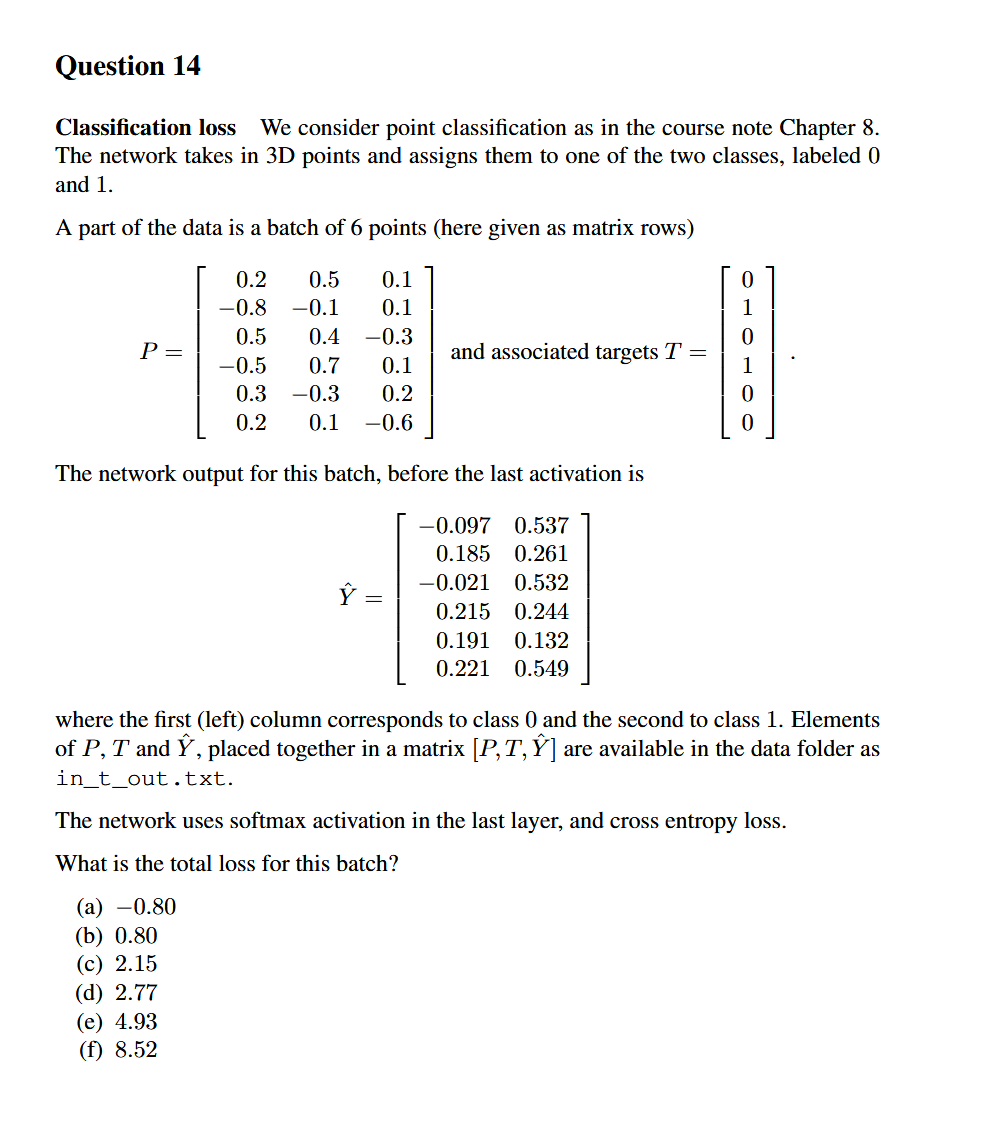

In [1]:
import numpy as np

def softmax(logits):
    """
    Apply softmax activation to convert logits to probabilities.
    
    Args:
        logits: Raw network outputs before activation (batch_size, num_classes)
    
    Returns:
        probabilities: Softmax probabilities (batch_size, num_classes)
    """
    # Subtract max for numerical stability
    shifted_logits = logits - np.max(logits, axis=1, keepdims=True)
    exp_logits = np.exp(shifted_logits)
    probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    return probabilities

def cross_entropy_loss(probabilities, targets):
    """
    Calculate cross entropy loss.
    
    Args:
        probabilities: Softmax probabilities (batch_size, num_classes)
        targets: True class labels (batch_size,)
    
    Returns:
        loss: Average cross entropy loss across the batch
    """
    batch_size = targets.shape[0]
    
    # Convert targets to one-hot encoding if needed
    if len(targets.shape) == 1:
        num_classes = probabilities.shape[1]
        one_hot_targets = np.zeros((batch_size, num_classes))
        one_hot_targets[np.arange(batch_size), targets] = 1
    else:
        one_hot_targets = targets
    
    # Calculate cross entropy: -sum(target * log(probability))
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    clipped_probabilities = np.clip(probabilities, epsilon, 1 - epsilon)
    
    loss_per_sample = -np.sum(one_hot_targets * np.log(clipped_probabilities), axis=1)
    average_loss = np.mean(loss_per_sample)
    
    return average_loss, loss_per_sample

# Input data from the problem
P = np.array([
    [0.2,  0.5,  0.1],
    [-0.8, -0.1, 0.1],
    [0.5,  0.4, -0.3],
    [-0.5, 0.7,  0.1],
    [0.3, -0.3,  0.2],
    [0.2,  0.1, -0.6]
])

targets = np.array([0, 1, 0, 1, 0, 0])

# Network output before last activation (logits)
Y_logits = np.array([
    [-0.097, 0.537],
    [0.185,  0.261],
    [-0.021, 0.532],
    [0.215,  0.244],
    [0.191,  0.132],
    [0.221,  0.549]
])

print("=== Classification Loss Calculation ===\n")

print("Input points P:")
print(P)
print(f"Shape: {P.shape}\n")

print("Target labels T:")
print(targets)
print(f"Shape: {targets.shape}\n")

print("Network output before activation (logits):")
print(Y_logits)
print(f"Shape: {Y_logits.shape}\n")

# Step 1: Apply softmax activation
probabilities = softmax(Y_logits)
print("After softmax activation (probabilities):")
print(probabilities)
print("Each row sums to:", np.sum(probabilities, axis=1))
print()

# Step 2: Calculate cross entropy loss
average_loss, individual_losses = cross_entropy_loss(probabilities, targets)

print("Cross entropy loss per sample:")
for i, loss in enumerate(individual_losses):
    print(f"Sample {i+1}: {loss:.4f}")

print(f"\nAverage cross entropy loss: {average_loss:.4f}")

# Show predicted vs actual classes
predicted_classes = np.argmax(probabilities, axis=1)
print(f"\nPredicted classes: {predicted_classes}")
print(f"Actual classes:    {targets}")
print(f"Accuracy: {np.mean(predicted_classes == targets):.4f}")

=== Classification Loss Calculation ===

Input points P:
[[ 0.2  0.5  0.1]
 [-0.8 -0.1  0.1]
 [ 0.5  0.4 -0.3]
 [-0.5  0.7  0.1]
 [ 0.3 -0.3  0.2]
 [ 0.2  0.1 -0.6]]
Shape: (6, 3)

Target labels T:
[0 1 0 1 0 0]
Shape: (6,)

Network output before activation (logits):
[[-0.097  0.537]
 [ 0.185  0.261]
 [-0.021  0.532]
 [ 0.215  0.244]
 [ 0.191  0.132]
 [ 0.221  0.549]]
Shape: (6, 2)

After softmax activation (probabilities):
[[0.3466041  0.6533959 ]
 [0.48100914 0.51899086]
 [0.36516867 0.63483133]
 [0.49275051 0.50724949]
 [0.51474572 0.48525428]
 [0.41872733 0.58127267]]
Each row sums to: [1. 1. 1. 1. 1. 1.]

Cross entropy loss per sample:
Sample 1: 1.0596
Sample 2: 0.6559
Sample 3: 1.0074
Sample 4: 0.6788
Sample 5: 0.6641
Sample 6: 0.8705

Average cross entropy loss: 0.8227

Predicted classes: [1 1 1 1 0 1]
Actual classes:    [0 1 0 1 0 0]
Accuracy: 0.5000


In [ ]:

#%% Question 14 Classification loss
# Answer (e)
in_t_out = np.loadtxt('data/in_t_out.txt')
x = in_t_out[:, 0:3]
t = in_t_out[:, 3].astype(int)
yhat = in_t_out[:, 4:]

y = np.exp(yhat)
y = y/y.sum(axis=1, keepdims=True)

loss = -np.log(y[range(len(y)), t]).sum()
print(f'Question 14: {loss}')

Question 14: 4.936206870617411


: 